<h1> Phishing Domain Detection </h1>

<h3>
Project By: Laxman B 19BCE1105, Dhaya Sagar K 19BCE1726
</h3>


**Dataset Link:** https://raw.githubusercontent.com/laxmanbalaraman/Phishing-website-prediction/main/phishing_detection.csv<br/>
**Feature description**: https://docs.google.com/document/d/1AGBWnCNGseN9Gv3gW2e5tfVzcu87Mfbo/edit?usp=sharing&ouid=117945722635081072189&rtpof=true&sd=true

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### importing dataset and dataset analysis

In [2]:
df = pd.read_csv("../input/phishing-domain-dataset/phishing_dataset.csv")

In [3]:
df.head()
# result is the target attribute

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape

(11055, 31)

Dataset has 11055 rows and 32 column

In [5]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

### checking for null values

In [7]:
# no null values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### checking if target class is equally balanced 

<AxesSubplot:xlabel='Result', ylabel='count'>

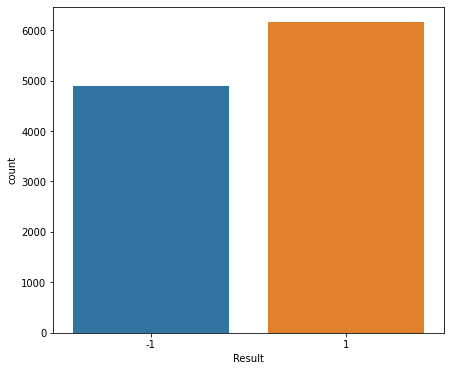

In [8]:
plt.figure(figsize=(7,6))
# count numbers of class records for 'Result' target attribute
sns.countplot('Result', data = df)

In [9]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

we can see the target class count is almost equally balanced. Hence Data augmentation is necessary

### Identifying multicollinear columns

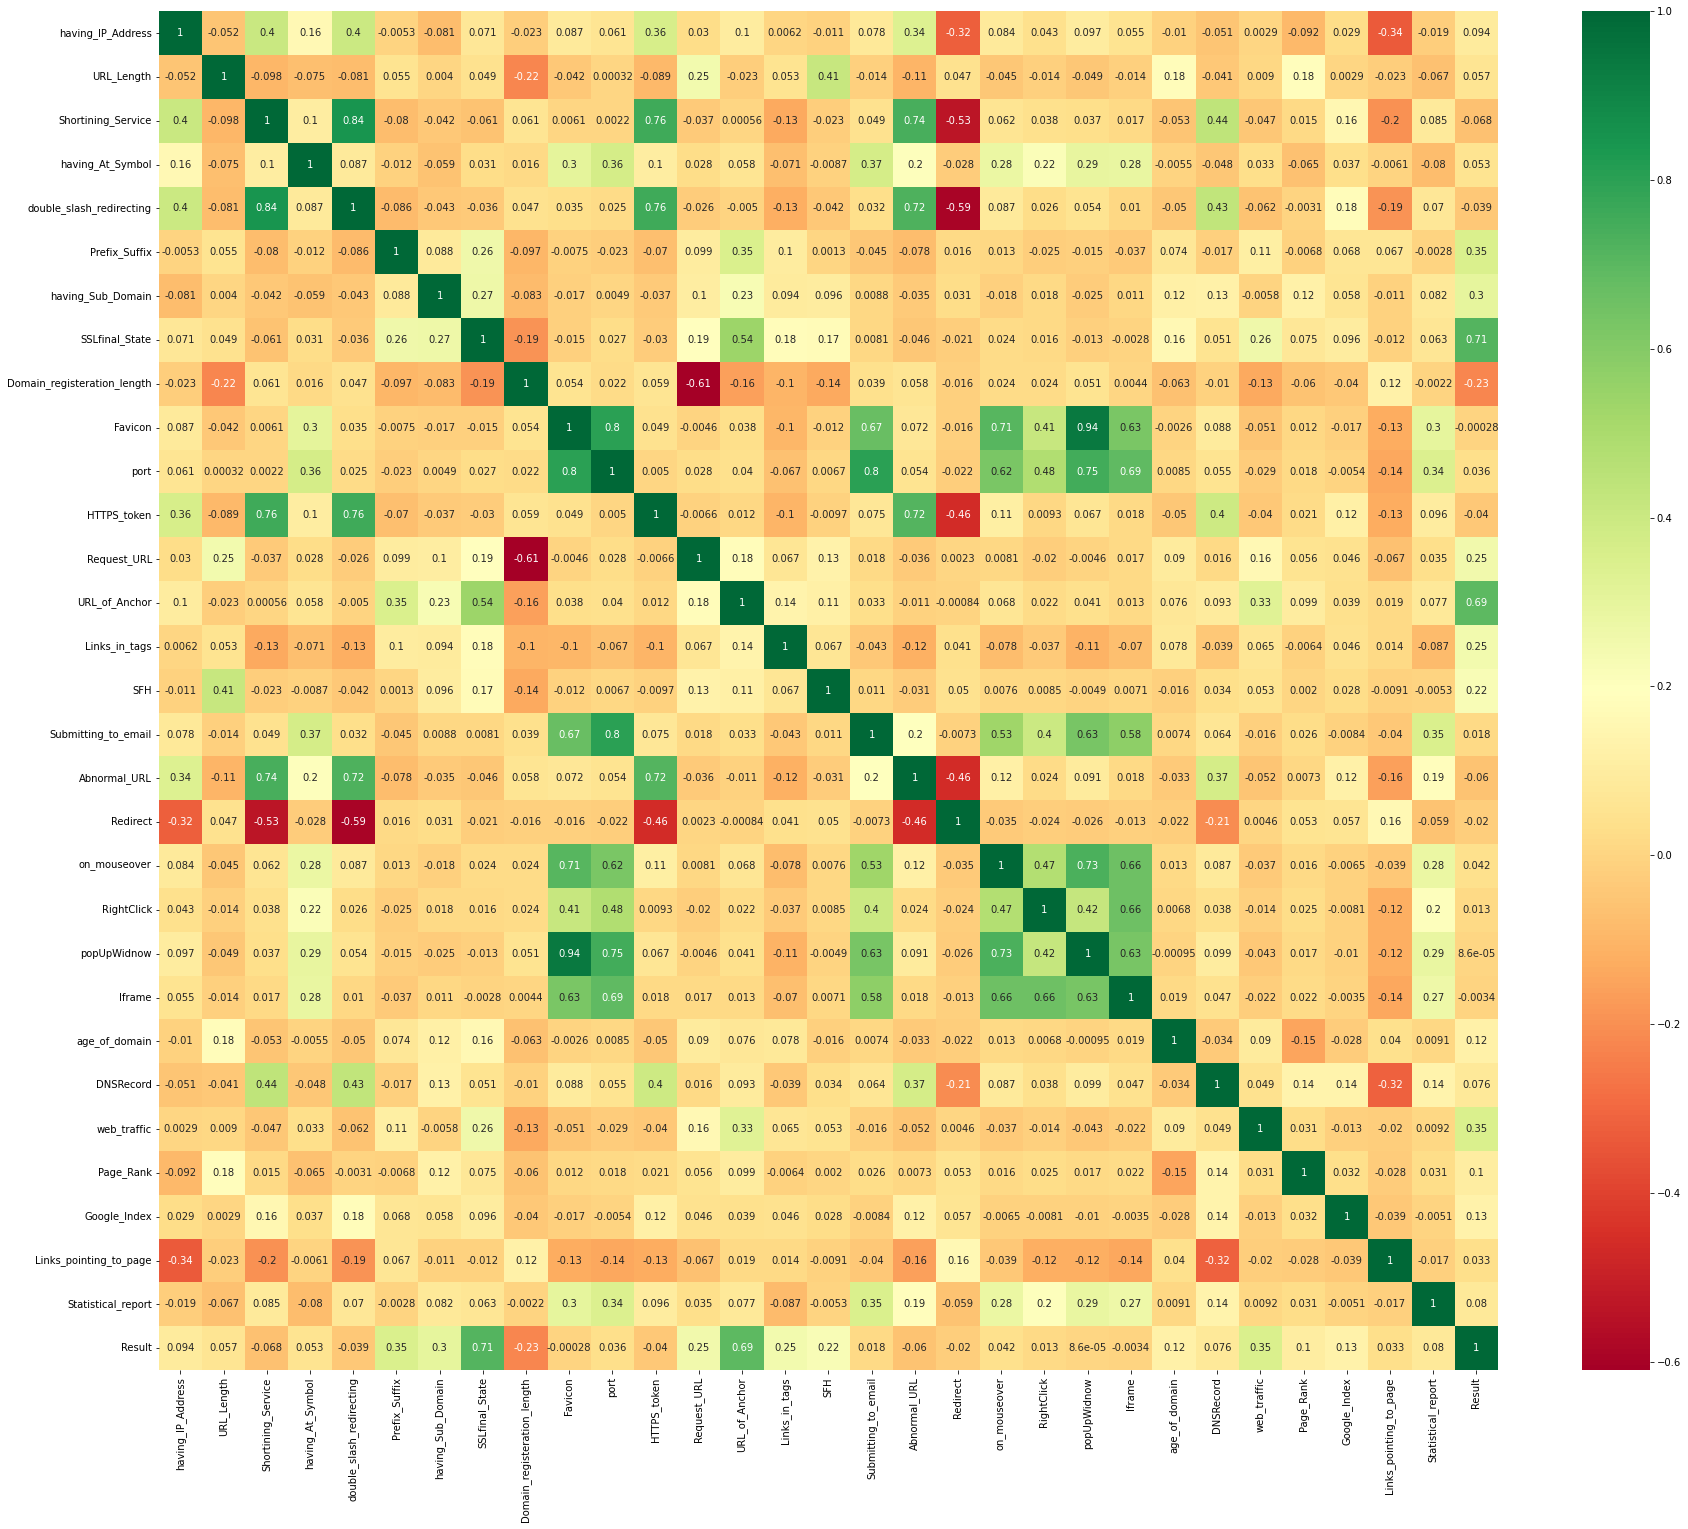

In [10]:
# creating correlation matrix on the features 
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30, 25))
# representation of correalation matrix through heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [11]:
col_corr = set() # Set of all the names of deleted columns
def correlation(dataset, threshold):
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] # getting the name of column
              col_corr.add(colname)

In [12]:
# remove multicollinear column with collinearity greater than 0.85
correlation(df, 0.85)
col_corr

{'popUpWidnow'}

In [13]:
# identifying weakly correlated features with target attribute
weak_col_corr = set()
def weakcorrelation(dataset, threshold):
  corr_matrix = dataset.corr()
  idx = 0
  for feature in corr_matrix['Result']:
    if(feature < threshold):
      weak_col_corr.add(corr_matrix.columns[idx])
    idx += 1
  
 # dropping features with correlation less than 0.01 
weakcorrelation(df, 0.01)
print(weak_col_corr)

{'Domain_registeration_length', 'popUpWidnow', 'Favicon', 'HTTPS_token', 'Abnormal_URL', 'Shortining_Service', 'Iframe', 'double_slash_redirecting', 'Redirect'}


In [14]:
# gathering all columns that were identified to be deleted
del_col = col_corr.union(weak_col_corr)
del_col

{'Abnormal_URL',
 'Domain_registeration_length',
 'Favicon',
 'HTTPS_token',
 'Iframe',
 'Redirect',
 'Shortining_Service',
 'double_slash_redirecting',
 'popUpWidnow'}

In [15]:
# dropping columns permanantly
df.drop(del_col, axis = 1, inplace = True)

In [16]:
df.isnull().sum()

having_IP_Address         0
URL_Length                0
having_At_Symbol          0
Prefix_Suffix             0
having_Sub_Domain         0
SSLfinal_State            0
port                      0
Request_URL               0
URL_of_Anchor             0
Links_in_tags             0
SFH                       0
Submitting_to_email       0
on_mouseover              0
RightClick                0
age_of_domain             0
DNSRecord                 0
web_traffic               0
Page_Rank                 0
Google_Index              0
Links_pointing_to_page    0
Statistical_report        0
Result                    0
dtype: int64

### splitting dataset into train and test 

In [17]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [18]:
# input attribute and target attribute
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [19]:
y

,Result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [20]:
# train test split with test size as 0.25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Decision tree classifier

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
clf.score(X_train, y_train)

0.9879387287420094

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591172214182344


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.95      0.96      0.95      1236
           1       0.97      0.96      0.96      1528

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



**Confusion matrix for decision tree model**

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.



In [25]:
# the confusion matrix for our model
confusion_matrix(y_test, y_pred)

array([[1188,   48],
       [  65, 1463]])

<AxesSubplot:>

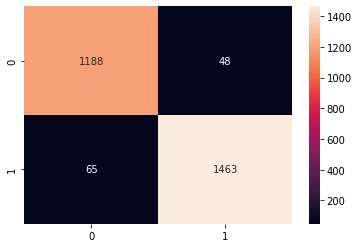

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# fittin the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# prediction on validation dataset
y_pred = rfc.predict(X_test)

In [29]:
# prediction on training dataset
y_pred_train = rfc.predict(X_train)

In [30]:
from sklearn import metrics
print("Train ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred_train))

Train ACCURACY OF THE MODEL:  0.9879387287420094


In [31]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9638205499276411


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1236
           1       0.96      0.97      0.97      1528

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



In [33]:
confusion_matrix(y_test, y_pred)

array([[1177,   59],
       [  41, 1487]])

<AxesSubplot:>

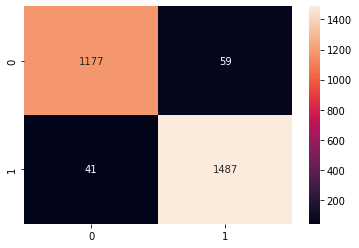

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

### SVM


In [35]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)


In [36]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [37]:
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Accuracy of training data: ', svc_model.score(X_train, y_train))
print('Accuracy of validation data: ',svc_model.score(X_test, y_test))

Accuracy of training data:  0.7096852008201664
Accuracy of validation data:  0.701519536903039


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
# generating classification report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

          -1       0.67      0.66      0.66      1236
           1       0.73      0.74      0.73      1528

    accuracy                           0.70      2764
   macro avg       0.70      0.70      0.70      2764
weighted avg       0.70      0.70      0.70      2764



In [39]:
confusion_matrix(y_test, prediction)

array([[ 811,  425],
       [ 400, 1128]])

<AxesSubplot:>

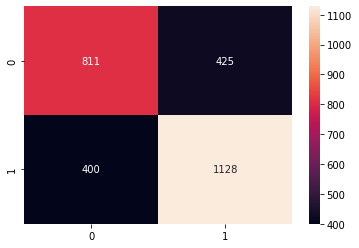

In [40]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='0.0f')

### K-nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### choosing the best values of k (neighbours)

In [42]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accurry = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

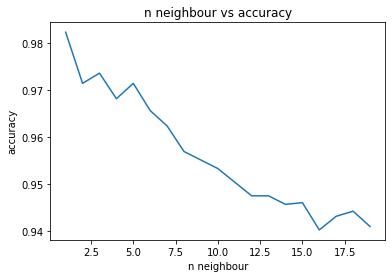

In [43]:
# plotting for n neighbour vs accuracy
plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

we can see the accuracy is highest for n_neighbours = 1

#### KNN with n_neighbour = 1 

In [44]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(Y_pre_train, y_train)
test_accurry = accuracy_score(Y_pre_test, y_test)
print('Accuracy for train dataset for K-neariest : ', train_accurry)
print('Accuracy for test dataset for K-neariest : ', test_accurry)

Accuracy for train dataset for K-neariest :  0.9828729948136533
Accuracy for test dataset for K-neariest :  0.9489869753979739


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pre_test ))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94      1236
           1       0.96      0.95      0.95      1528

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764



In [48]:
confusion_matrix(y_test, Y_pre_test )

array([[1175,   61],
       [  80, 1448]])

<AxesSubplot:>

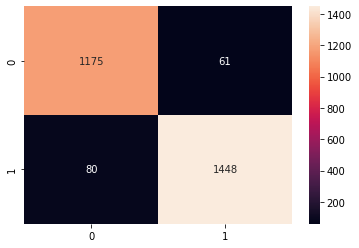

In [49]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [52]:
y_pre_test = lgr.predict(X_test)
y_pre_train = lgr.predict(X_train)

In [53]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for logistic reg : ', train_accurry)
print('Accuracy for test dataset for logistic reg : ', test_accurry)

Accuracy for train dataset for logistic reg :  0.9272705343143167
Accuracy for test dataset for logistic reg :  0.9218523878437048


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))


              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1236
           1       0.91      0.95      0.93      1528

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [55]:
confusion_matrix(y_test, y_pre_test )

array([[1098,  138],
       [  78, 1450]])

<AxesSubplot:>

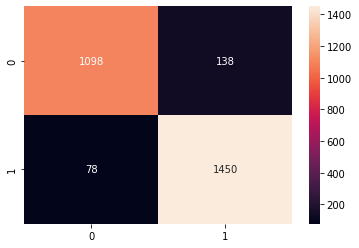

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pre_test), annot = True, fmt='0.0f')

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [58]:
# Bernoullis Navaive bayes classifier
nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [59]:
y_pre_test = nvb.predict(X_test)
y_pre_train = nvb.predict(X_train)

In [60]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.911590881678929
Accuracy for test dataset for naive bayes reg :  0.9059334298118669


In [61]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))


              precision    recall  f1-score   support

          -1       0.90      0.89      0.89      1236
           1       0.91      0.92      0.92      1528

    accuracy                           0.91      2764
   macro avg       0.91      0.90      0.90      2764
weighted avg       0.91      0.91      0.91      2764



In [62]:
confusion_matrix(y_test, y_pre_test)

array([[1096,  140],
       [ 120, 1408]])

<AxesSubplot:>

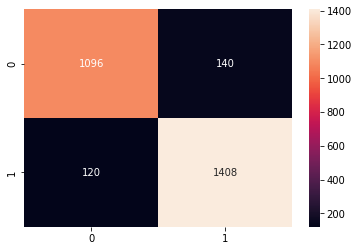

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

### Adaboost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
clf.score(X_train, y_train)

0.9342660716439513

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9290882778581766


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1236
           1       0.92      0.95      0.94      1528

    accuracy                           0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



<AxesSubplot:>

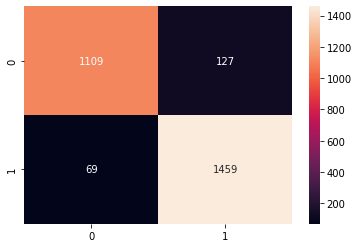

In [68]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

**<H2>Hybrid Ensembler</h2>**

**Ensembler method used** - **Max voting:** It is mainly used for classification problems. The method consists of building multiple models independently and getting their individual output called ‘vote’. The class with maximum votes is returned as output. 

In [69]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [70]:
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = LogisticRegression(random_state=0)
model_4 = BernoulliNB()
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3), ('NaiveBayes', model_4),
                                        ('DT', model_5)], voting='hard')

In [71]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [72]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.9863707634784706
Accuracy for test dataset for naive bayes reg :  0.9620115774240231
